<a href="https://colab.research.google.com/github/HaiDang2107/Movie_Review_Classification/blob/main/movie_review_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import imdb

# Load training data, test data

In [ ]:
(train_data, train_label), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
print(train_data.shape, test_data.shape)

(25000,) (25000,)


# Convert from a sequence of keys into the origin comment

In [ ]:
word_index = imdb.get_word_index() # dictionary mapping
reversed_word_index = dict([(value, key) for (key, value) in word_index.items()]) # Chuyển từ key sang value
decoded_review = ' '.join([reversed_word_index.get(i - 3, '?') for i in train_data[0]]) # 3 kí tự đầu là ký tự đặc biệt
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

# Prepare the data
- Ta cần chuyển danh sách các số nguyên thành vecto nhị phân (gồm các giá trị 0, 1) có độ dài cố định bởi Machine Learning cần đầu vào có kích thước cố định.
- Bên cạnh đó, một số mô hình yêu cầu kiểu dữ liệu float32 nên cần chuyển về kiểu này

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  # Tạo một ma trận 0 có shape(samples, words_indices) ~ (samples, 10000)
  results = np.zeros((len(sequences), dimension))

  # Hàm enumerate(sequences) duyệt qua từng phần tử của sequences và trả về (index, value) của từng phàn tử
  # result[i, sequence] = 1. : đánh dấu tại sample i, từ sequence đã xuất hiện
  # 1. là kiểu float32
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

# vectorize training data and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Build a network

 1. Model definition







In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # input_shape= : Xác định số features của input ~ (batch_size, features)
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2. Compiling the model

Chuẩn bị mô hình trước khi training. We choose:
*   Optimizer
*   Loss function: Here, we opt for binary_crossentropy because it is suitable for probability output
*   Metrics: Chỉ số đánh giá mô hình, không ảnh hưởng đến quá trình training như loss function

!!! Có thể cấu hình lại parameter của optimizer hoặc pass một custom loss function (hàm mất mát tùy chỉnh)/custom metrics



In [ ]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

3. Set a validation set aside
- Validation set (tập kiểm tra) là tập dữ liệu dùng để quan sát mô hình có đang học tốt không trong quá trình học
- Validation set được lấy một phần từ training data và không được dùng để cập nhật trọng số
- Nếu loss trên validation set tăng nhưng traning loss giảm thì đây là dấu hiệu của overfitting<br>**Explain:** Mô hình hoạt động tốt trên training data, nhưng khi gặp dữ liệu mới (validation  data), mô hình không còn tổng quát được (overfit trên training data) dẫn đến validation loss tăng

In [ ]:
x_val = x_train[:10000]           # [:10000] ~ [0:10000]: lấy 10000 từ phần tử từ phần tử [0]
partial_x_train = x_train[10000:] # [10000:]: lấy từ phần tử thứ 10000 đến hết
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

- Ta cũng có thể chỉ định số lượng samples của validation set trong lệnh fit() mà không cần chia thủ công

4. Training the model

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)) # validation_split=0.2: Lấy 20% dữ liệu làm validation (lấy ngẫu nhiên)
# Object history ghi lại những dữ liệu dùng để đánh giá mô hình trong quá trình training

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - accuracy: 0.6803 - loss: 0.6044 - val_accuracy: 0.8579 - val_loss: 0.3994
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.8947 - loss: 0.3399 - val_accuracy: 0.8689 - val_loss: 0.3293
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9181 - loss: 0.2506 - val_accuracy: 0.8763 - val_loss: 0.3059
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9331 - loss: 0.1974 - val_accuracy: 0.8836 - val_loss: 0.2854
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9478 - loss: 0.1637 - val_accuracy: 0.8841 - val_loss: 0.2912
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9567 - loss: 0.1413 - val_accuracy: 0.8804 - val_loss: 0.2967
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9645 - loss: 0.1191 - val_accuracy: 0.8852 - val_loss: 0.2952
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9702 - loss: 0.1031 - val_accuracy: 0.8838 - 

# Evaluate the model

1. Plot the training and validation loss

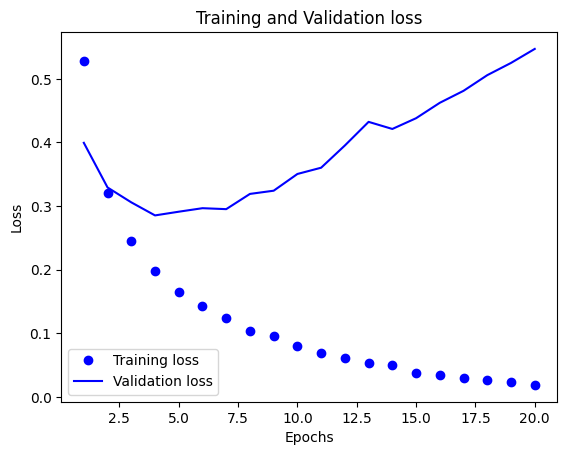

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history # .history: tham chiếu đến thuộc tính history (là một dictionary/map)
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss'] # Tập validation

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') # 'bo' means "blue dot"
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # 'b' means "solid (liền mạch) blue line"
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() # chú giải

plt.show()

- Save the graph

In [ ]:
# Lưu ý: phải mouth trước
# Nếu đóng Colab hoặc khởi động lại runtime thì cần mount lại Google Drive vì Colab sẽ mất kết nối với Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Lưu biểu đồ vào Google Drive
plt.savefig('/content/drive/My Drive/Colab Notebooks/loss.png')

# Nếu bạn muốn lưu dưới dạng PDF
# plt.savefig('/content/drive/My Drive/my_plot.pdf')


<Figure size 640x480 with 0 Axes>

2. Plot the training and validation accuracy
- Accuracy được tính dựa trên tỉ lệ phần trăm các dự đoán đúng so số lượng dự đoán trong training/validation set

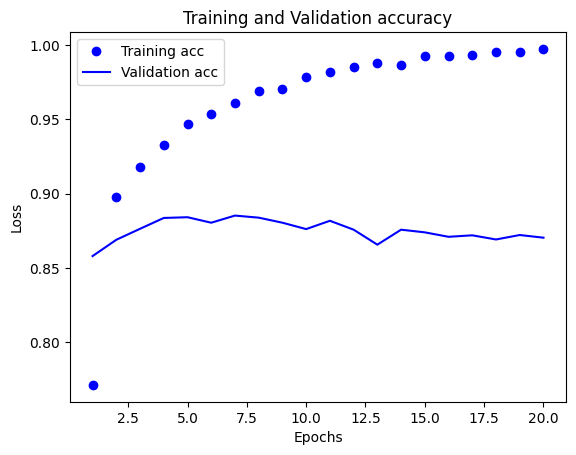

In [ ]:
plt.clf() # Clear the figure

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy'] # Tập validation

plt.plot(epochs, acc_values, 'bo', label='Training acc') # 'bo' means "blue dot"
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') # 'b' means "solid (liền mạch) blue line"
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

- Save the graph

In [ ]:
# Lưu ý: phải mouth trước
# Lưu biểu đồ vào Google Drive
plt.savefig('/content/drive/My Drive/Colab Notebooks/accuracy.png')

# Nếu bạn muốn lưu dưới dạng PDF
# plt.savefig('/content/drive/My Drive/my_plot.pdf')


<Figure size 640x480 with 0 Axes>

3. Evaluation <br>

Từ graph, ta có thể nhận xét quá trình training:
- Nếu training loss tăng và training accuracy giảm, hay loss vẫn cao sau nhiều epochs ==> Mô hình học kém
- Nếu training loss hội tụ về gần 0 (hay training accuracy hội tụ về gần 1), nhưng validation loss không hội tụ về gần 0 (validation accuracy không gần 1) ==> Overfitting

Nếu gặp những vấn đề trên ==> retrain the model from scratch (train lại từ đầu)

Bên cạnh đó, nếu loss hay accuracy ổn định về phần sau của graph thì ta có thể rút số lượng epochs khi retrain.


#Retrain the model

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # input_shape= : Xác định số features của input ~ (batch_size, features)
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_split=0.15)

# trả về tuple (loss, <chỉ số, ở đây là accuracy>) cuối cùng của model
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6971 - loss: 0.6019 - val_accuracy: 0.8356 - val_loss: 0.4392
Epoch 2/4
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8825 - loss: 0.3660 - val_accuracy: 0.8733 - val_loss: 0.3368
Epoch 3/4
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9169 - loss: 0.2641 - val_accuracy: 0.8649 - val_loss: 0.3360
Epoch 4/4
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9296 - loss: 0.2133 - val_accuracy: 0.8822 - val_loss: 0.2963
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8798 - loss: 0.2948
[0.2938968241214752, 0.8815600275993347]


- Draw the loss graph

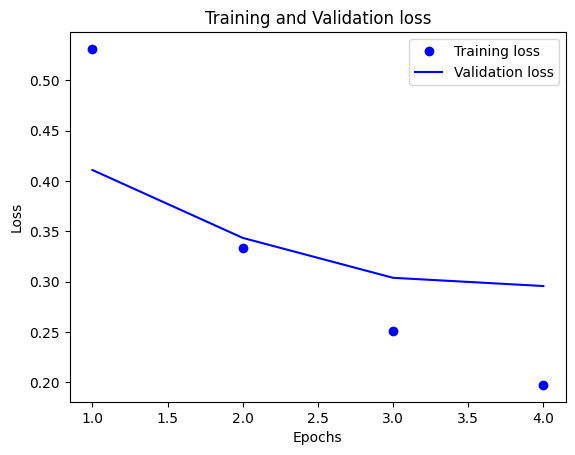

<Figure size 640x480 with 0 Axes>

In [ ]:
history_dict = history.history # .history: tham chiếu đến thuộc tính history (là một dictionary/map)
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss'] # Tập validation

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') # 'bo' means "blue dot"
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # 'b' means "solid (liền mạch) blue line"
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.savefig('/content/drive/My Drive/Colab Notebooks/retrain_loss.png')

- Draw the accuracy graph

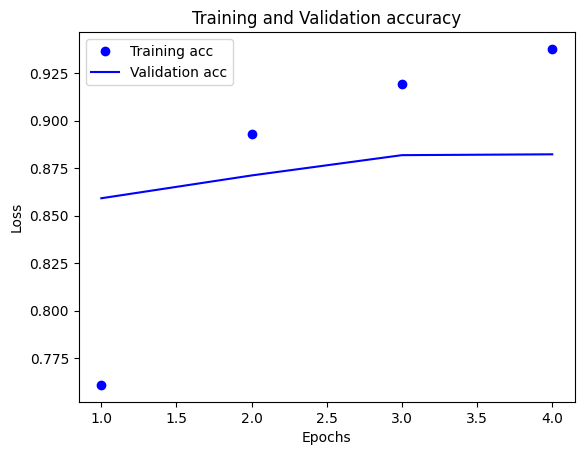

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.clf() #Clear the figure

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy'] # Tập validation

plt.plot(epochs, acc_values, 'bo', label='Training acc') # 'bo' means "blue dot"
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') # 'b' means "solid (liền mạch) blue line"
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.savefig('/content/drive/My Drive/Colab Notebooks/retrain_accuracy.png')

- Lưu lại mô hình vào Google Drive:
<p><b><u>Step 1:</u></b> Mouth Google Drive (gắn Google Drive vào môi trường làm việc)</p>
<p><b><u>Step 2:</u></b> Lưu mô hình</p>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/TrainedMovieReviewClassificationModel.keras')
# Trong Keras, định dạng .h5 được sử dụng để lưu trữ mô hình học sâu bao gồm tất cả các thông tin về mô hình như kiến trúc, trọng số và cấu hình huấn luyện.

# Predict the new data

- Tải mô hình trước khi dự đoán

In [ ]:
# Tải lại mô hình trước khi dự đoán
from keras.models import load_model
model = load_model("/content/drive/My Drive/Colab Notebooks/TrainedMovieReviewClassificationModel.keras")

In [ ]:
model.predict(x_test)
print(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [ ]:
# Từ điển ánh xạ từ từ sang chỉ số
# word_index = imdb.get_word_index()

# Thêm 3 phần tử đặc biệt vào từ điển (để giải quyết các chỉ số cho padding và các từ không có trong từ điển)
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>'] = 2
word_index['<UNUSED>'] = 3

comment = "I am a great fan of David Lynch and have everything that he's made on DVD, except for Hotel Room and the two-hour Twin Peaks movie. So when I found out about this, I immediately grabbed it. And… what is this? It's a bunch of poorly drawn black-and-white cartoons that are loud and foul-mouthed."

# Chuyển chuỗi thành danh sách các chỉ số
comment_indices = [word_index.get(word, 2) for word in comment.lower().split()]  # Sử dụng '<UNK>' cho từ không có trong từ điển

In [ ]:
comment_indices_vectorize = vectorize_sequences([comment_indices])

model.predict(comment_indices_vectorize)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.40032494]], dtype=float32)